# Maximum Likelihood Estimation 


In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import simulate
import inference
%matplotlib inline

np.random.seed(1)

Similary, we first consider a system of $N = 100$ variables, coupling variance parameter $g = 2.0$

In [2]:
# parameter setting:
n = 100    # number of variables
g = 2.0    # coupling variance
w0 = np.random.normal(0.0,g/np.sqrt(n),size=(n,n))

Data length $L=2000$ is used as the first test.

In [3]:
l = 2000
s = simulate.generate_data(w0,l)

Unlike nMF and TAP, eMF is an iterative method, we first apply this method as discribed in (Ref), without stopping criterion. So that, it can be over fitting in the limit of small sample sizes.

In [4]:
niter = 50
w = inference.emf(s,niter,stop_criterion='no')

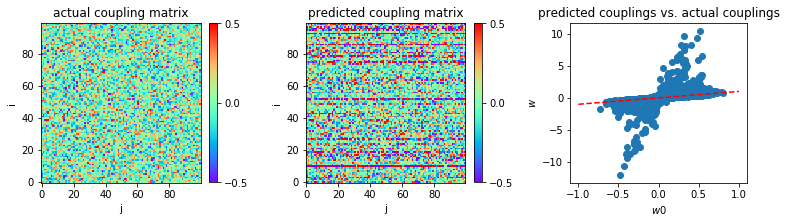

In [5]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,2))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(w0,w)
plt.xlabel('$w0$')
plt.ylabel('$w$')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [6]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.3277436995067658)


Now, we apply our stopping criterion for this method. We stop the iteration when the discrepancy starts to increase.  We will see that the performance significantly improve.

In [7]:
niter = 50
w = inference.emf(s,niter,stop_criterion='yes')

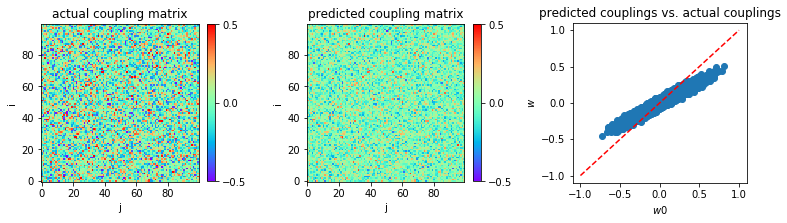

In [8]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,2))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(w0,w)
plt.xlabel('$w0$')
plt.ylabel('$w$')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [9]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.0072491113790595)
